# The Traveling Salesperson Problem
If you have never encountered the traveling sales person problem, it can be seen <a href="https://en.wikipedia.org/wiki/Travelling_salesman_problem">here</a>. It is a classic problem in the field of computer science, and most certainly worth looking. A short and sweet problem description is as follows:
> *Given a set of cities and the distance between each pair of cities, what is the shortest possible tour that visits each city exactly once, and returns to the starting city?*

This walkthrough is going to work on developing some solutions to the problem, and in general demonstrate *how to think about* solving problems. 

<img src="images/tsp.png">

The first thing we want to ask whenever faced with a problem of this sort, is do we understand the problem statement enoguh to program a solution? Let's think for a moment:
<br>
* ***Given a set of cities***<br>
    A Python `set` could represent a set of cities. An individual city may be just an integer index, or it might be (x,y) coordinates.  
* ***...and the distance between each pair of cities***<br>
    We could use either a function, `distance(A, B)`, or a table, `distance[A,B]`. 
* ***...what is the shortest possible tour***<br>
    A tour is a sequential order in which to visit the cities; a function `shortest_tour(tours)` should find the one that minimizes `tour_length(tour)`, which is the sum of the distances between adjacent cities in the tour. 
* ***...that visits each city once and returns to the starting city***<br>
    Make sure the tour doesn't re-visit a city (except returning to the start)
    
At this point we don't have all of the answers, but we have are at a good point to start attacking the problem! We can being by bringing in a few imports that we will utilize during the notebook.

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
from time import clock
from itertools import permutations, combinations
from functools import lru_cache as cache
from collections import Counter
from statistics import mean, median
from math import factorial

---
# Exhaustive Search Algorithm: `exhaustive_tsp`
To begin, let's start with an algorithm that comes with a *guarantee* that it will solve the problem, albeit inefficiently. 
> **Exhaustive Search Algorithm**: *Generate all possible tours of the cities, and choose the shortest tour (the one with minimum tour length).*

The design philosphy that we will follow here is to first write an English description of the algorithm (as we did above), and then write python code that closely mirrors the English description. This will probably require some auxilliary functions and data structures; at first we can just assume that they exist, put them on a TO DO list, and eventually define them with the same design philosophy. 

In [3]:
def exhaustive_tsp(cities):
  """Generate all possible tours of the cities and choose the shortest tour."""
  return shortest_tour(alltours(cities))

def shortest_tour(tours): return min(tours, key=tour_length)

# TO DO: Data types: City, Cities, Tour; Functions: alltours, tour_length

This gives us a good starting point. The Python code above closely matches our English description. Now we can tackle the TO DO list. 

**Tours**: A tour that starts in city 1, moves to 2, then 3, then back to 1 will be represented by `(1, 2, 3)`. Any valid tour of a set of cities will be a *permutation* of the cities. That means that we can implement `alltours` with the built in `permutations` function (from `itertools` module). Recall, **permutation** is the case where order matters. The length of a tour is the sum of the distances between adjacent cities in the tour - the sum of the lengths of the **links** between cities in the tour. 

**Cities**: The only thing we need to know about a city is its distance to other cities. We don't need to know its name, population, or anything else. We'll assume the distance between two cities is the <a href="https://en.wikipedia.org/wiki/Euclidean_distance">Euclidean distance</a>, the straight-line distance between points in a two-dimensional plane. So we want `City(300, 100)` to be the city with x-coordinate 300 and y coordinate 100. At first glance it seems like Python does not have a builtin type for a point in the two-dimensional plane, but there actually is one: complex numbers. We can implement `City` with `complex`, which means the distance between two cities, `distance(A, B)` is the absolute value of the vector difference between them. If has been a while since you worked with complex numbers, recall that the absolute value of a complex number is defined as:

#### $$|a + bi| = \sqrt{a^2 + b^2}$$

The absolute value of a complex number is also known as the **modulus**. In case this isn't clear, recall that the definition of the absolute value of a variable, $x$, is defined as:

#### $$|x| = \sqrt{x^2}$$

And we can apply the geometric interpretation of the absolute value of a real number, *it's distance from the origin 0*, to the complex case. Hence, the absolute value of a complex number is defined by the Euclidean distance of the complex point to the origin. The can be computed using pythagorean theorem, but thankfully python has a built in `abs` function we can make use of. Feel free to read more about <a href="https://en.wikipedia.org/wiki/Absolute_value#Complex_numbers">absolute value of complex numbers</a>.

We can also define `Cities(n)` to make a set of `n` random cities. We want `Cities(n)` to be reproducible (to return the same result when called with the same arugments), so we provide an optional argument that sets `random.seed`. 

In [4]:
alltours = permutations                   # Setting alltours to be equivalent to built in permutations function

def tour_length(tour):
  """The total of distances between each pair of consecutive cities in the tour.
  This includes the last-to-first, distance(tour[-1, tour[0]])"""
  return sum(distance(tour[i - 1], tour[i]) for i in range(len(tour)))

City = complex                            # Setting City to be equivalent to built in complex function

def distance(A, B): return abs(A - B)                  # Return absolute value of complex variable

def Cities(n, seed=123, width=999, height=666):
  """Create a set of n cities, sampled uniformly from a (width x height) rectangle"""
  random.seed((n, seed))
  return frozenset(City(random.randint(1, width), random.randint(1, height)) for c in range(n))

# Our first solution!
At this point we have built all of the functions that we need. We are ready to use `exhaustive_tsp` to find a tour for a set of cities. Note, the order in which functions are being called is:
> 
  1. `exhaustive_tsp()` is called and is passed in `Cities(9)` as a parameter
  2. `Cities(9)` will be returning a frozen set of 9 different cities, which are represented as complex numbers using Python's built in `complex` data structure.
  3. Once `exhaustive_tsp()` has the frozen set containing 9 different cities, it calls the function `shortest_tour()`, and it passes `shortest_tour()` the input parameter `alltours(cities)`
  4. `alltours()` is a copy of the built in `permutations` function. So all tours will return all possible permutations of the data structure it is passed. Because it was passed `cities`, a frozen set of our cities, it will return a permutation of all possible city orderings.
  5. So, the permutations of all possible city ordering, `tours`, is then passed to `shortest_tour`, which returns the `min` of `tours`. It does this using the built in `min` function, like so `min(tours, key=tour_length)`. The key, `tour_length` is the function that is applied to each specific `tour`.
  6. `tour_length` takes in an individual `tour`, and it then iterates through each two consecutive cities and determines the distance between them using the `distance` function. It then sums up all of the distances and returns the total distance traveled. 
  7. `shortest_tour` will pick the minimum of the returned distance totals form the `tour_length` function, and then that will be the return value from `exhaustive_search`. We have our answer!

In [5]:
exhaustive_tsp(Cities(9))

((158+421j),
 (297+397j),
 (832+102j),
 (872+207j),
 (817+315j),
 (939+600j),
 (620+498j),
 (163+639j),
 (31+501j))

You may immediately be asking yourself, but how do we know that this is the shortest tour? Let's create set of functions that allows us to visualize our results. 

# Visualizing results: `plot_tour` and `do` 

In [6]:
def plot_tour(tour, style='bo-'):
  """Plot every city and link in the tour, and highlight start city."""
  if len(tour) > 1000: plt.figure(figsize=(15,10))
  start = tour[0:1]
  plot_segment(tour + start, style)
  plot_segment(start, 'rD')                # The start city will be a red diamond
  
def plot_segment(segment, style='bo-'):
  """Plot every city and link in the segment."""
  plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on=False)
  plt.axis('scaled')
  plt.axis('off')
  
def X(city): """X coordinate."""; return city.real
def Y(city): """Y coordinate."""; return city.imag

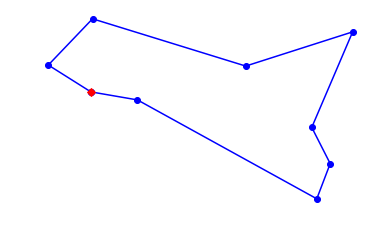

In [7]:
plot_tour(exhaustive_tsp(Cities(9)))

Awesome! That definitely looks as though it could be the shortest path, even though we have no way of definitively proving it right now. 

Also, from a vocabulary standpoint we are going to want to define 1 more term, **segment**. A segment is a portion of the tour that does not loop back to the start. The **segment** `(1, 2, 3)`, has only two links, `1-2` and `2-3`, whereas the **tour** `(1, 2, 3)` has three links, because it includes the link back to the state, `3-1`.

One more convenience: the function `do` runs a TSP algorithm on a set of cities, plots the tours, asserts it is valid, and prints summary information.

In [13]:
def do(algorithm, cities):
  """Apply a TSP algorithm to cities, plot the result, and print info."""
  t0 = clock()
  tour = algorithm(cities)
  t1 = clock()
  assert Counter(tour) == Counter(cities) # Ensure every city appears once in tour
  plot_tour(tour)
  print("{}: {} cities => tour length {:.0f} (in {:.3f} sec)".format(
  name(algorithm), len(tour), tour_length(tour), t1 - t0))
  
def name(algorithm): return algorithm.__name__.replace('_tsp', '')

exhaustive: 9 cities => tour length 2450 (in 1.440 sec)


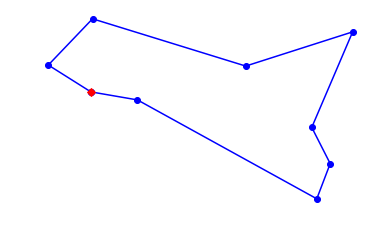

In [15]:
do(exhaustive_tsp, Cities(9))

# Optimization: non-redundant `alltours`

By using the built in `permutation` function to represents our `alltours` function, we are saying there that are $n!$ tours of $n$ cities, and thus 6 tours of 3 cities:

In [16]:
list(alltours({1, 2, 3}))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

Can you see the problem here? This is redundant! `(1, 2, 3), (2, 3, 1), (3, 1, 2)` are three ways of describing the same tour. So let's arbitrarily say that tour must start with the first city in the set of cities. This will essential reduce our permutation from $n!$ to $(n-1)!$ While we are redefining `alltours`, we can take the opportunity to define a tour as a *list* rather than a *tuple*. It does not matter now, but we may want to end up representing *partial* tours, to which we can append cities one by one; appending can be done to lists, but not tuples. 

In [29]:
def alltours(cities):
  """Return a list of non-redundant tours (permutations of cities)"""
  start, *others = cities
  return [[start] + Tour(perm) for perm in permutations(others)]

Tour = list

Great, we can now verify that for 3 cities there are only 2 tours. We can also see that `exhaustive_tsp` can now do 9 cities in about 1/7 the time it had taken before.

In [33]:
alltours({1, 2, 3})

[[1, 2, 3], [1, 3, 2]]

exhaustive: 9 cities => tour length 2450 (in 0.218 sec)


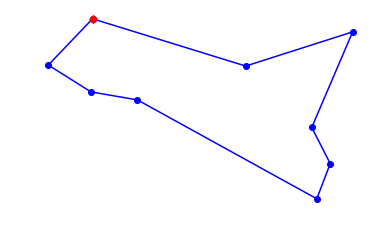

In [34]:
do(exhaustive_tsp, Cities(9))

We can also see that `exhaustive_tsp` can now do 10 cities in about the time it took to do 9 before.

exhaustive: 10 cities => tour length 2720 (in 1.960 sec)


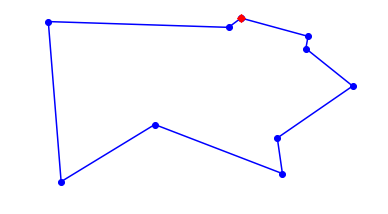

In [35]:
do(exhaustive_tsp, Cities(10))

# Can `exhaustive_tsp` scale?
Some quick math can show us that this stragegy that we are currently using will **not** scale well. At this point, our `exhaustive_tsp` algorithm takes 0.218 seconds for 9 cities. Well, based on our non-redundant `alltours` method, that still means we are doing $(n-1)!$, in this case 8!. That yields:

In [41]:
factorial(8)

40320

We could then say that for 9 cities, we have to perform 40320 `tour_length` calculations, and it takes 0.218 seconds. That leaves us with a rate of:

In [45]:
time_per_tour_length_calculation = 0.218 / factorial(8)
time_per_tour_length_calculation

5.406746031746032e-06

So, approximately 5.4e-6 seconds is how long it takes to perform one `tour_length` calculation. This makes sense if we compare this value to the time it took for 10 cities:

In [46]:
time_per_tour_length_calculation * factorial(9)

1.962

We get nearly the exact value that was returned in our actual run time, 1.960. So, if we are willing to say that our time per tour length calculation is correct, let's see how long it will take for our `exhaustive_tsp` algorithm to run as we increase the number of cities:

In [67]:
for i in range(10,18): print(i, ' Cities:', time_per_tour_length_calculation * factorial(i), 'seconds') 

10  Cities: 19.62 seconds
11  Cities: 215.82000000000002 seconds
12  Cities: 2589.84 seconds
13  Cities: 33667.92 seconds
14  Cities: 471350.88 seconds
15  Cities: 7070263.2 seconds
16  Cities: 113124211.2 seconds
17  Cities: 1923111590.4 seconds


For referrence, lets just look at how long 17 days would take. We can see that it clocked in at 1923111590.4 seconds, but just how long is that?

In [68]:
print(1923111590.4  / (60*60*24), ' days')
print(1923111590.4  / (60*60*24*365), ' years')

22258.236  days
60.981468493150686  years


Okay, so I think that we can agree that this method is not exactly scalable. There must be another way! But what...?

# General Strategies